<a href="https://colab.research.google.com/github/madhu-05-hub/nlp/blob/main/nlpass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk matplotlib


In [2]:
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [3]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
text = "This is a natural language processing assignment. It involves topics such as unigram,bigram,trigram , and n-gram modelling.The final outcome should be pushed in git hub repository. The link of public repository of an individual should be submitted in classroom assignment. "
tokens = word_tokenize(text.lower())


In [6]:
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

In [7]:
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

In [8]:
cfd = ConditionalFreqDist(bigram_freq)
bigram_prob = {bg: cfd[bg[0]].freq(bg[1]) for bg in bigram_freq}

def predict_next_word(word):
    if word in cfd:
        return cfd[word].most_common(1)[0][0]
    else:
        return None


In [11]:
print("Unigrams:")
print(unigram_freq.most_common())
print("\nBigrams:")
print(bigram_freq.most_common())
print("\nTrigrams:")
print(trigram_freq.most_common())
print("\nBigram Probabilities:")
for bg, prob in bigram_prob.items():
    print(f"{bg}: {prob:.4f}")

print("\nNext word prediction for 'processing':")
print(predict_next_word('sample'))

Unigrams:
[(('.',), 3), ((',',), 3), (('assignment',), 2), (('should',), 2), (('be',), 2), (('in',), 2), (('repository',), 2), (('of',), 2), (('this',), 1), (('is',), 1), (('a',), 1), (('natural',), 1), (('language',), 1), (('processing',), 1), (('it',), 1), (('involves',), 1), (('topics',), 1), (('such',), 1), (('as',), 1), (('unigram',), 1), (('bigram',), 1), (('trigram',), 1), (('and',), 1), (('n-gram',), 1), (('modelling.the',), 1), (('final',), 1), (('outcome',), 1), (('pushed',), 1), (('git',), 1), (('hub',), 1), (('the',), 1), (('link',), 1), (('public',), 1), (('an',), 1), (('individual',), 1), (('submitted',), 1), (('classroom',), 1)]

Bigrams:
[(('assignment', '.'), 2), (('should', 'be'), 2), (('this', 'is'), 1), (('is', 'a'), 1), (('a', 'natural'), 1), (('natural', 'language'), 1), (('language', 'processing'), 1), (('processing', 'assignment'), 1), (('.', 'it'), 1), (('it', 'involves'), 1), (('involves', 'topics'), 1), (('topics', 'such'), 1), (('such', 'as'), 1), (('as', 'u

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '.'),
  Text(1, 0, ','),
  Text(2, 0, 'assignment'),
  Text(3, 0, 'should'),
  Text(4, 0, 'be'),
  Text(5, 0, 'in'),
  Text(6, 0, 'repository'),
  Text(7, 0, 'of'),
  Text(8, 0, 'this'),
  Text(9, 0, 'is')])

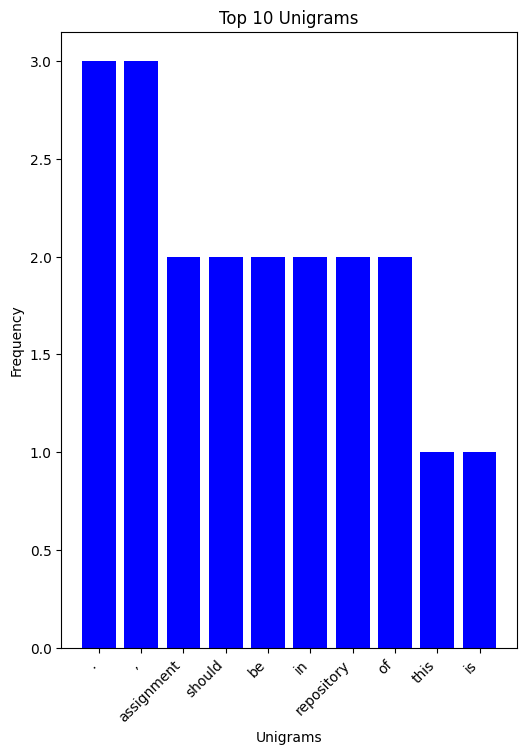

In [17]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
unigram_labels, unigram_values = zip(*unigram_freq.most_common(10))
unigram_labels = [label[0] for label in unigram_labels]
plt.bar(unigram_labels, unigram_values, color='blue')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'assignment .'),
  Text(1, 0, 'should be'),
  Text(2, 0, 'this is'),
  Text(3, 0, 'is a'),
  Text(4, 0, 'a natural'),
  Text(5, 0, 'natural language'),
  Text(6, 0, 'language processing'),
  Text(7, 0, 'processing assignment'),
  Text(8, 0, '. it'),
  Text(9, 0, 'it involves')])

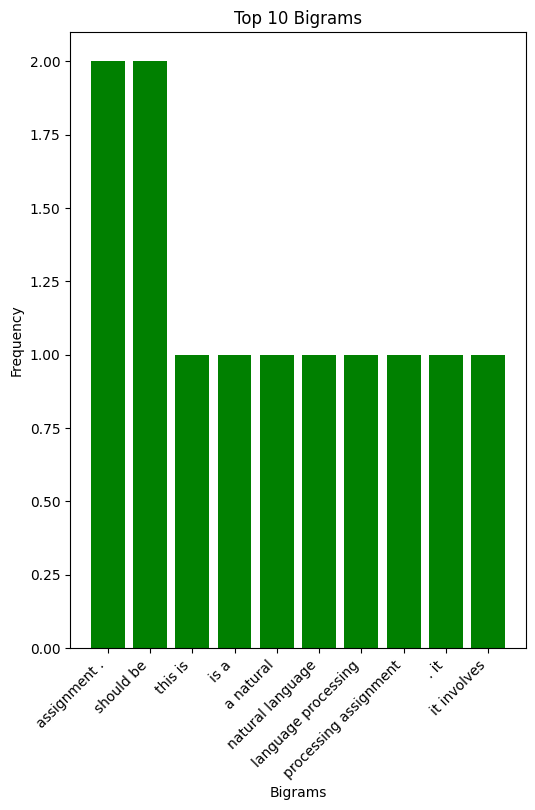

In [30]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 2)
bigram_labels, bigram_values = zip(*bigram_freq.most_common(10))
bigram_labels = [f'{x[0]} {x[1]}' for x in bigram_labels]
plt.bar(bigram_labels, bigram_values, color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams')
plt.xticks(rotation=45, ha='right', fontsize=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'this is a'),
  Text(1, 0, 'is a natural'),
  Text(2, 0, 'a natural language'),
  Text(3, 0, 'natural language processing'),
  Text(4, 0, 'language processing assignment'),
  Text(5, 0, 'processing assignment .'),
  Text(6, 0, 'assignment . it'),
  Text(7, 0, '. it involves'),
  Text(8, 0, 'it involves topics'),
  Text(9, 0, 'involves topics such')])

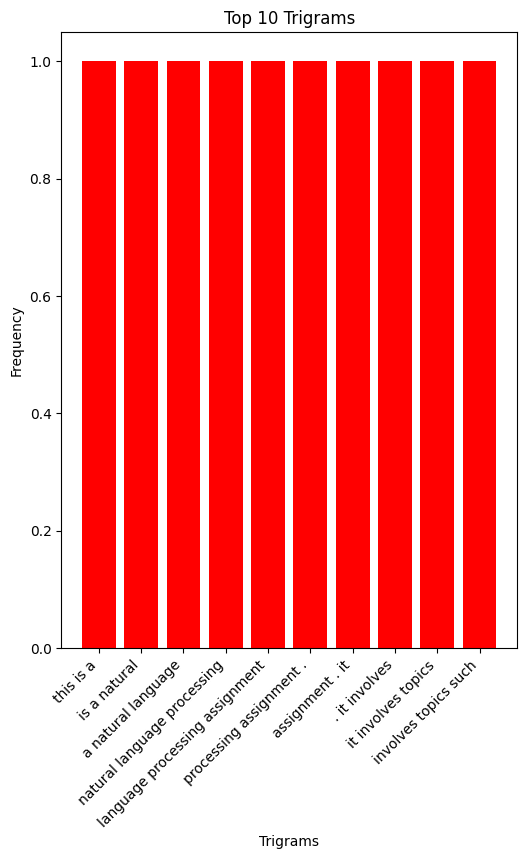

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 3)
trigram_labels, trigram_values = zip(*trigram_freq.most_common(10))
trigram_labels = [f'{x[0]} {x[1]} {x[2]}' for x in trigram_labels]
plt.bar(trigram_labels, trigram_values, color='red')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams')
plt.xticks(rotation=45, ha='right', fontsize=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'assignment .'),
  Text(1, 0, 'should be'),
  Text(2, 0, 'this is'),
  Text(3, 0, 'is a'),
  Text(4, 0, 'a natural'),
  Text(5, 0, 'natural language'),
  Text(6, 0, 'language processing'),
  Text(7, 0, 'processing assignment'),
  Text(8, 0, 'it involves'),
  Text(9, 0, 'involves topics')])

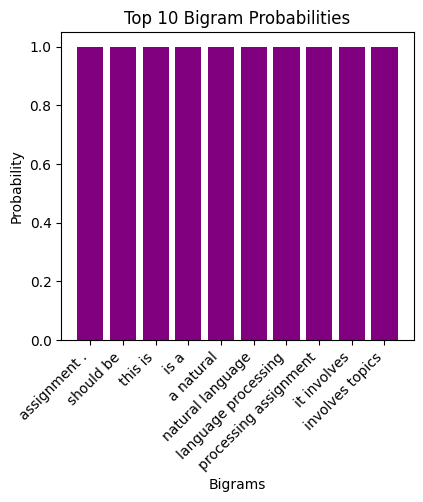

In [35]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
bigram_prob_labels, bigram_prob_values = zip(*sorted(bigram_prob.items(), key=lambda item: item[1], reverse=True)[:10])
bigram_prob_labels = [f'{x[0]} {x[1]}' for x in bigram_prob_labels]
plt.bar(bigram_prob_labels, bigram_prob_values, color='purple')
plt.xlabel('Bigrams')
plt.ylabel('Probability')
plt.title('Top 10 Bigram Probabilities')
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Next Word Prediction')

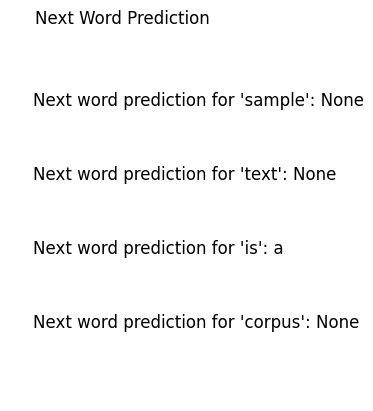

In [36]:
next_word_examples = ['sample', 'text', 'is', 'corpus']
predictions = {word: predict_next_word(word) for word in next_word_examples}

plt.subplot(1, 2, 2)
plt.axis('off')
for i, (word, next_word) in enumerate(predictions.items(), start=1):
    plt.text(0.1, 1 - (i * 0.2), f"Next word prediction for '{word}': {next_word}", fontsize=12)

plt.title('Next Word Prediction')
